# Практическая работа №2
### Самарин Н.А. КИ21-17/1Б
Задание: построить классификатор для классификации изображений. Классификатор должен предсказывать, что находится на фото - съедобное или несъедобное (Food and non-food image dataset).
Датасет можно скачать по ссылке: https://www.kaggle.com/datasets/trolukovich/food5k-image-dataset?select=evaluation
Разбить выборку на тренировочную, валидационную и тестирующую выборку в случайном порядке.
Выбрать три архитектуры для построения ИНС. Можно взять готовые, можно придумать свои.
Обучить ИНС. Если сеть начала переобучаться, то или упростить модель, или применить регуляризацию, или использовать dropout, или делать аугментацию, или использовать раннюю остановку.
Запустить обученные модели на тестирующей выборке и посчитать их точность. Сделать выводы по поводу соответствия точности на валидационной и тестирующей выборке.
Взять готовую архитектуру нейронной сети (VGG16, VGG19, GoogleNet и другие) с предобученными весами, переобучить "верхушку" нейронной сети для решения поставленной задачи, то есть сделать перенос обучения.

In [1]:
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

from keras import layers
from keras.src.callbacks import EarlyStopping, ModelCheckpoint

from keras.models import Sequential
from keras.applications import VGG16
from keras.optimizers import RMSprop, Adam

In [11]:
def plot_train_val_accuracy_loss(history):
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.subplot(2, 2, 2)
    plt.plot(history.history['binary_accuracy'], label='binary_accuracy')
    plt.plot(history.history['val_binary_accuracy'], label='val_binary_accuracy')
    plt.legend()
    plt.title('Accuracy')

In [12]:
data_generator = ImageDataGenerator(rescale=1/255)

train_data = data_generator.flow_from_directory('training', target_size=(224,224),
                          class_mode='binary', batch_size = 3, shuffle=True)
data_generator = ImageDataGenerator(rescale=1/255)
val_data = data_generator.flow_from_directory('validation', target_size=(224,224),
                                  class_mode='binary', batch_size=3, shuffle=True)
data_generator = ImageDataGenerator(rescale=1/255)
test_data = data_generator.flow_from_directory('evaluation', target_size=(224,224),
                                  class_mode='binary', batch_size=3, shuffle=True)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# Определяем параметры аугментации
data_augmentation = Sequential(
  [
    # Отражение по горизонтали
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(224, 224,3)),
    # Вращение на рандомное значение до 0.05
    layers.experimental.preprocessing.RandomRotation(0.05),
    # Меняем контрастность изображений
    layers.experimental.preprocessing.RandomContrast(0.23),
    # Изменяем размер
    layers.experimental.preprocessing.RandomZoom(0.2)
  ]
)

In [14]:
model_1 = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_1.compile(loss='binary_crossentropy',
            #optimizer = RMSprop(lr=0.001),
            optimizer=Adam(learning_rate=0.001),
             metrics = ['binary_accuracy'])
checkpoint_filepath_1 = 'best_model_1.h5'
model_checkpoint_callback_1 = ModelCheckpoint(
    filepath=checkpoint_filepath_1,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

model_2 = Sequential([
    data_augmentation,
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(64, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    layers.Conv2D(64, (2,2), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss='binary_crossentropy',
            #optimizer = RMSprop(lr=0.001),
            optimizer=Adam(learning_rate=0.001),
             metrics = ['binary_accuracy'])
checkpoint_filepath_2 = 'best_model_2.h5'
model_checkpoint_callback_2 = ModelCheckpoint(
    filepath=checkpoint_filepath_2,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

model_3 = Sequential([
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss='binary_crossentropy',
            #optimizer = RMSprop(lr=0.001),
            optimizer=Adam(learning_rate=0.001),
             metrics = ['binary_accuracy'])
checkpoint_filepath_3 = 'best_model_3.h5'
model_checkpoint_callback_3 = ModelCheckpoint(
    filepath=checkpoint_filepath_3,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)


early_stopping = EarlyStopping(monitor='val_loss', start_from_epoch=4, patience=1)

In [15]:
loss_results = []

In [25]:
history_1 = model_1.fit(train_data, batch_size=500, verbose=1, epochs=20,validation_data=val_data,callbacks=[model_checkpoint_callback_1, early_stopping])

Epoch 1/20
1000/1000 [==============================] - 100s 97ms/step - loss: 0.5342 - binary_accuracy: 0.7487 - val_loss: 0.4311 - val_binary_accuracy: 0.8320
Epoch 2/20


C:\Users\yormu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1000/1000 [==============================] - 107s 107ms/step - loss: 0.4421 - binary_accuracy: 0.8020 - val_loss: 0.4226 - val_binary_accuracy: 0.8210
Epoch 3/20
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4306 - binary_accuracy: 0.8153 - val_loss: 0.3739 - val_binary_accuracy: 0.8310
Epoch 4/20
1000/1000 [==============================] - 96s 96ms/step - loss: 0.4026 - binary_accuracy: 0.8230 - val_loss: 0.3788 - val_binary_accuracy: 0.8530
Epoch 5/20
1000/1000 [==============================] - 95s 95ms/step - loss: 0.3871 - binary_accuracy: 0.8343 - val_loss: 0.3336 - val_binary_accuracy: 0.8520
Epoch 6/20
1000/1000 [==============================] - 89s 89ms/step - loss: 0.3596 - binary_accuracy: 0.8513 - val_loss: 0.3278 - val_binary_accuracy: 0.8530
Epoch 7/20
1000/1000 [==============================] - 89s 89ms/step - loss: 0.3515 - binary_accuracy: 0.8540 - val_loss: 0.3327 - val_binary_accuracy: 0.8640


334/334 [==============================] - 9s 27ms/step - loss: 0.4176 - binary_accuracy: 0.8320
Model 1:
Test Loss : 0.4176
Test Accuracy : 0.8320


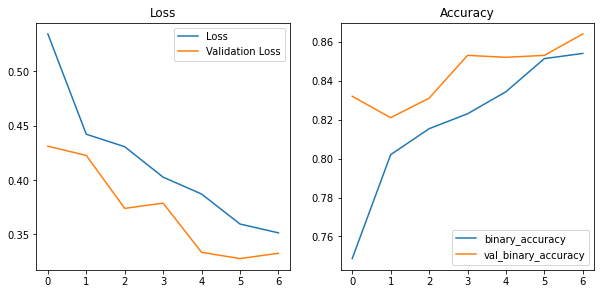

In [26]:
score = model_1.evaluate(test_data)
print("Model 1:")
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])
plot_train_val_accuracy_loss(history_1)

In [27]:
history_2 = model_2.fit(train_data, batch_size=500, verbose=1, epochs=20,validation_data=val_data,callbacks=[model_checkpoint_callback_2, early_stopping])

Epoch 1/20
1000/1000 [==============================] - 50s 49ms/step - loss: 0.5422 - binary_accuracy: 0.7420 - val_loss: 0.4443 - val_binary_accuracy: 0.8050
Epoch 2/20
1000/1000 [==============================] - 48s 48ms/step - loss: 0.4677 - binary_accuracy: 0.7887 - val_loss: 0.4024 - val_binary_accuracy: 0.8300
Epoch 3/20
1000/1000 [==============================] - 48s 48ms/step - loss: 0.4334 - binary_accuracy: 0.8150 - val_loss: 0.3760 - val_binary_accuracy: 0.8310
Epoch 4/20
1000/1000 [==============================] - 48s 48ms/step - loss: 0.3986 - binary_accuracy: 0.8193 - val_loss: 0.4424 - val_binary_accuracy: 0.7910
Epoch 5/20
1000/1000 [==============================] - 48s 48ms/step - loss: 0.3702 - binary_accuracy: 0.8413 - val_loss: 0.3708 - val_binary_accuracy: 0.8520
Epoch 6/20
1000/1000 [==============================] - 48s 48ms/step - loss: 0.3504 - binary_accuracy: 0.8557 - val_loss: 0.2791 - val_binary_accuracy: 0.8740
Epoch 7/20
1000/1000 [==================

334/334 [==============================] - 6s 17ms/step - loss: 0.3695 - binary_accuracy: 0.8450
Model 2:
Test Loss : 0.3695
Test Accuracy : 0.8450


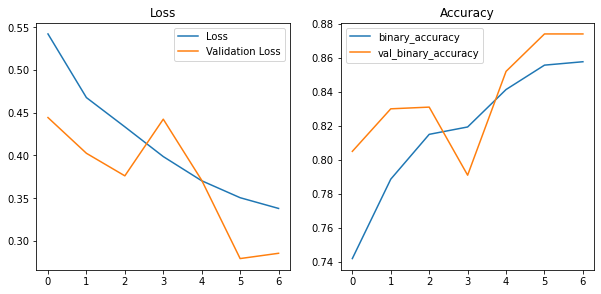

In [28]:
score = model_2.evaluate(test_data)
print("Model 2:")
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])
plot_train_val_accuracy_loss(history_2)

In [8]:
history_3 = model_3.fit(train_data, batch_size=500, verbose=1, epochs=20,validation_data=val_data,callbacks=[model_checkpoint_callback_3, early_stopping])

Epoch 1/20


1000/1000 [==============================] - 52s 50ms/step - loss: 0.6077 - binary_accuracy: 0.6843 - val_loss: 0.4511 - val_binary_accuracy: 0.8070
Epoch 2/20
   1/1000 [..............................] - ETA: 1:20 - loss: 0.3156 - binary_accuracy: 1.0000

C:\Users\yormu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1000/1000 [==============================] - 56s 56ms/step - loss: 0.4803 - binary_accuracy: 0.7757 - val_loss: 0.4493 - val_binary_accuracy: 0.8240
Epoch 3/20
1000/1000 [==============================] - 55s 55ms/step - loss: 0.4540 - binary_accuracy: 0.7983 - val_loss: 0.4385 - val_binary_accuracy: 0.8040
Epoch 4/20
1000/1000 [==============================] - 55s 55ms/step - loss: 0.4370 - binary_accuracy: 0.8053 - val_loss: 0.3876 - val_binary_accuracy: 0.8320
Epoch 5/20
1000/1000 [==============================] - 54s 54ms/step - loss: 0.4239 - binary_accuracy: 0.8170 - val_loss: 0.3974 - val_binary_accuracy: 0.8340
Epoch 6/20
1000/1000 [==============================] - 55s 55ms/step - loss: 0.4080 - binary_accuracy: 0.8270 - val_loss: 0.3501 - val_binary_accuracy: 0.8490
Epoch 7/20
1000/1000 [==============================] - 52s 52ms/step - loss: 0.3699 - binary_accuracy: 0.8483 - val_loss: 0.4220 - val_binary_accuracy: 0.8200


334/334 [==============================] - 7s 21ms/step - loss: 0.5275 - binary_accuracy: 0.7880
Model 3:
Test Loss : 0.5275
Test Accuracy : 0.7880


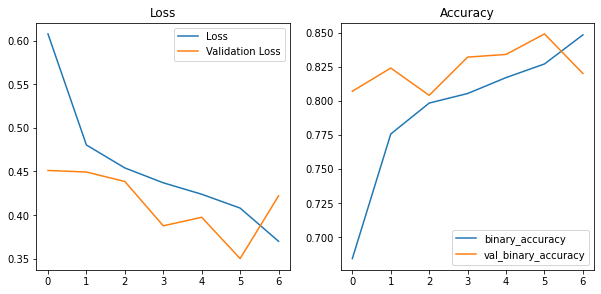

In [9]:
score = model_3.evaluate(test_data)
print("Model 3:")
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])
plot_train_val_accuracy_loss(history_3)

In [16]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

model_4 = Sequential([
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(512),
    layers.Dense(1, activation='sigmoid')
])

model_4.layers[1].trainable = False

model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['binary_accuracy']
)

checkpoint_filepath_4 = 'best_model_4.h5'
model_checkpoint_callback_4 = ModelCheckpoint(
    filepath=checkpoint_filepath_4,
    monitor='val_binary_accuracy',
    mode='max',
    save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [17]:
history_4 = model_4.fit(train_data, batch_size=500, verbose=1, epochs=20,validation_data=val_data,callbacks=[model_checkpoint_callback_4, early_stopping])

Epoch 1/20


1000/1000 [==============================] - ETA: 0s - loss: 1.5083 - binary_accuracy: 0.8757

C:\Users\yormu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1000/1000 [==============================] - 437s 435ms/step - loss: 1.5083 - binary_accuracy: 0.8757 - val_loss: 0.1396 - val_binary_accuracy: 0.9550
Epoch 2/20
1000/1000 [==============================] - 414s 414ms/step - loss: 0.2361 - binary_accuracy: 0.9203 - val_loss: 0.2355 - val_binary_accuracy: 0.9340
Epoch 3/20
1000/1000 [==============================] - 415s 415ms/step - loss: 0.2932 - binary_accuracy: 0.9180 - val_loss: 0.1859 - val_binary_accuracy: 0.9420


334/334 [==============================] - 86s 258ms/step - loss: 0.2324 - binary_accuracy: 0.9460
Model 4:
Test Loss : 0.2324
Test Accuracy : 0.9460


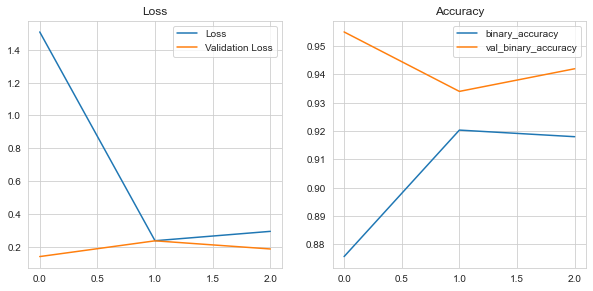

In [18]:
score = model_4.evaluate(test_data)
print("Model 4:")
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))
loss_results.append(score[0])
plot_train_val_accuracy_loss(history_4)

In [19]:
predicted = model_4.predict(test_data)

334/334 [==============================] - 83s 247ms/step


In [2]:
sq_predicted = tf.squeeze(predicted)
n_predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
con_mat = np.array(tf.math.confusion_matrix(predicted, test_data.classes, 2))
con_mat

array([[470,  30],
       [ 31, 469]])

In [3]:
con_mat_norm = np.around(con_mat / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = [0, 1],
                     columns = [0, 1])

In [4]:
con_mat_norm

array([[0.94, 0.06],
       [0.06, 0.94]])

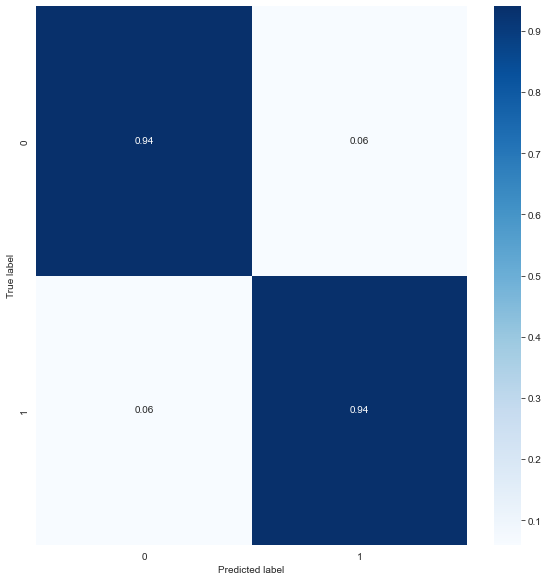

In [5]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()